# Text Mining From IMDB Datasets #
Author : Choirul Imam

Created: 20/05/2021

Description :
I want to classify movies reviews from IMDB Datasets. Theese review have two class which is positive and negative. 
I get all datasets from kaggle(https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

## What to do ##
First, lets try to vectorize all words. Then, i will try simple NNs with 1-2 layers. 
Next, try using lstm(single and bi directional).

Since the review is in english and there is a lot of NLP model for this language,
there is possibility to create deep learning using transfer learning.


In [1]:
# Install all required Library
!pip install tensorflow
!pip install 

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Try to get this database
# Please install wget or download file manually
# Skip if already download
!wget https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download
!unzip archive.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#import library
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [4]:
# insert csv file using pandas
imdb_data = pd.read_csv('IMDB Dataset.csv')
print('dataset info')
imdb_data.info()
print('dataset example')
print(imdb_data[1:10])
print('\nlongest string character : ')
imdb_data.review.map(len).max()

dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
dataset example
                                              review sentiment
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

longest string character : 


13704

In [5]:
# use copy of imdb_data insted imdb_data itself
# this ensure there is no change or modification to original imdb_data
base_data = imdb_data.copy()
base_len = base_data.review.str.split(' ').map(len)


231.14594


<AxesSubplot:title={'center':'word len per string'}>

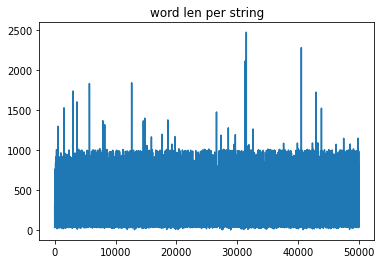

In [6]:
# Explore Data
print(base_len.mean())
base_len.plot(title='word len per string',x='string ', y='word len')

## Preprocessing data
- Try to vectorize / tokenize sentence
- padding data
- split to train and test (no validation test)

In [7]:

# Setup Hyper Parameter
embedding_dim = 100
max_length = 230
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size= 50000
test_portion=.2


In [32]:
# Vectorize all sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(base_data.iloc[:,0])

# basicly just get info on tokenizer
word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(base_data.iloc[:, 0]) # change word 2 vector
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type) # pad pad data

# split data to training and testing
split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]


In [33]:
# Explore Test sequences after vector
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(base_data.iloc[:,1])
labels = label_tokenizer.texts_to_sequences(base_data.iloc[:, 1]) #change all labels 2 vector

test_labels_pad = np.array(labels[0:split])
training_labels_pad = np.array(labels[split:training_size])


In [34]:
test_labels_pad

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [1]])

## Let's create NNs Model
Tokenizer -> LSTM -> Dense -> Output

Let's try this model with aprox. 2-3 layer.
Run around 3-5 epoch.
String length sets to around 20.
Hopefully this does't required a lot of time.


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 230, 100)          12425200  
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                2424      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 12,427,774
Trainable params: 12,427,774
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 30
history = model.fit(training_sequences, training_labels_pad, epochs=num_epochs, validation_split=0.2, verbose=1)

Epoch 1/30
1000/1000 [==============================] - 112s 112ms/step - loss: 0.2605 - accuracy: 0.8979 - val_loss: 0.2488 - val_accuracy: 0.8960
Epoch 2/30
1000/1000 [==============================] - 109s 109ms/step - loss: 0.1806 - accuracy: 0.9333 - val_loss: 0.2317 - val_accuracy: 0.9050
Epoch 3/30
1000/1000 [==============================] - 108s 108ms/step - loss: 0.1274 - accuracy: 0.9574 - val_loss: 0.2453 - val_accuracy: 0.9055
Epoch 4/30
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.2850 - val_accuracy: 0.8978
Epoch 5/30
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0604 - accuracy: 0.9839 - val_loss: 0.3096 - val_accuracy: 0.8945
Epoch 6/30
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0401 - accuracy: 0.9899 - val_loss: 0.3370 - val_accuracy: 0.8961
Epoch 7/30
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0273 - accuracy: 0.9937 - val_